# ANÁLISE DE DADOS

##### PROCESSAMENTO DE LINGUAGEM NATURAL E ANALISE DAS PALAVRAS MAIS RECORRENTES NOS ARTIGOS PUBLICADOS PELA REVISTA BRASILEIRA DE ENSINO DE FÍSICA

In [35]:
pip install beautifulsoup4 # Instala o analisador de HTML BeautifulSoup

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\venv\ilumpy\Scripts\python.exe -m pip install --upgrade pip' command.


In [36]:
from bs4 import BeautifulSoup # Importa a biblioteca BeautifulSoup

In [37]:
import requests # Importa a biblioteca requests

In [38]:
import codecs

# Abre os arquivos no formato html, extrai o conteúdo desses arquivos e obtem apenas o texto deles
filename = codecs.open("ARTIGOS HTML/artigo1.html", 'r', 'utf-8')
#print(filename)
document= BeautifulSoup(filename.read()).get_text()
#print(document)

In [45]:
listatotal = []
tot_art = 1697
var_div = 50
lista_de_artigos = ['artigo'+str(i)+'.html' for i in range(1,(int(round(tot_art+1)/var_div)))]

# Filtra a quantidade de artigos html para processar sem exceder a memória do notebook
lista_final = []
for i in range(1,var_div + 1):
    lista_final.append(lista_de_artigos[round((tot_art+1)/var_div) * (i-1):round((tot_art+1)/var_div) * i])

# Gera a lista com cada palavra do texto transformada em string
for i in lista_final[0]:
    nome_artigo = "ARTIGOS HTML\\" + str(i) # Diretório dos artigos na pasta
    if i != '.ipynb_checkpoints': # Exclui arquivos que não são htmls e foram criados pelo Jupyter Notebook na mesma pasta
        print(nome_artigo)
        filename = codecs.open(nome_artigo, 'r', 'utf-8') # Abre os arquivos no formato de leitura
        soup = BeautifulSoup(filename, 'html.parser') # Extrai os textos dos arquivos abertos
        for data in soup(['style', 'script']): # Remove tags dos textos htmls
            data.decompose()
        listatest = ' '.join(soup.stripped_strings)
        listatest = listatest.lower()
        listatotal.extend(str(listatest).split()) # Transforma cada palavra do texto em uma string e adiciona na listatotal

#print(listatotal)

ARTIGOS HTML\artigo1.html
ARTIGOS HTML\artigo2.html
ARTIGOS HTML\artigo3.html
ARTIGOS HTML\artigo4.html
ARTIGOS HTML\artigo5.html
ARTIGOS HTML\artigo6.html
ARTIGOS HTML\artigo7.html
ARTIGOS HTML\artigo8.html
ARTIGOS HTML\artigo9.html
ARTIGOS HTML\artigo10.html
ARTIGOS HTML\artigo11.html
ARTIGOS HTML\artigo12.html
ARTIGOS HTML\artigo13.html
ARTIGOS HTML\artigo14.html
ARTIGOS HTML\artigo15.html
ARTIGOS HTML\artigo16.html
ARTIGOS HTML\artigo17.html
ARTIGOS HTML\artigo18.html
ARTIGOS HTML\artigo19.html
ARTIGOS HTML\artigo20.html
ARTIGOS HTML\artigo21.html
ARTIGOS HTML\artigo22.html
ARTIGOS HTML\artigo23.html
ARTIGOS HTML\artigo24.html
ARTIGOS HTML\artigo25.html
ARTIGOS HTML\artigo26.html
ARTIGOS HTML\artigo27.html
ARTIGOS HTML\artigo28.html
ARTIGOS HTML\artigo29.html
ARTIGOS HTML\artigo30.html
ARTIGOS HTML\artigo31.html
ARTIGOS HTML\artigo32.html


In [40]:
# Stopwords em português:
import nltk
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:203]
[u'de', u'a', u'o', u'que', u'e', u'do', u'da', u'em', u'um', u'para']
len(stopwords)
print(stopwords)
print()

wordsFiltered = []

# Adiciona na lista filtrada apenas as palavras que não estão na lista dos stopwords
for word in listatotal:
    if word not in stopwords:
        wordsFiltered.append(word)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [41]:
string = ' '.join(map(str,wordsFiltered))
cinquentaprimeiras = []

# Exclui os caracteres e palavras que não são necessários processar
def palavras_mais_usadas(palavras):
    dicionario = {}
    palavras = palavras.split(" ")
    palavrasnew = []
    i = 0
    for caractere in palavras:
        #print(palavra)
        palavranew = caractere.replace('\n','')
        palavranew = palavranew.replace("/",'')
        palavranew = palavranew.replace("?",'')
        palavranew = palavranew.replace("!",'')
        palavranew = palavranew.replace(',','')
        palavranew = palavranew.replace(";",'')
        palavranew = palavranew.replace(':','')
        palavranew = palavranew.replace('.','')
        palavranew = palavranew.replace('"','')
        palavranew = palavranew.replace("'de",'')
        palavranew = palavranew.replace("'",'')
        palavranew = palavranew.replace("(",'')
        palavranew = palavranew.replace(")",'')
        palavranew = palavranew.replace("=",'')
        palavranew = palavranew.replace("+",'')
        palavranew = palavranew.replace("-",'')
        palavranew = palavranew.replace("close",'')
        palavranew = palavranew.replace("0",'')
        palavranew = palavranew.replace("1",'')
        palavranew = palavranew.replace("2",'')
        palavranew = palavranew.replace("3",'')
        palavranew = palavranew.replace("4",'')
        palavranew = palavranew.replace("5",'')
        palavranew = palavranew.replace("6",'')
        palavranew = palavranew.replace("7",'')
        palavranew = palavranew.replace("8",'')
        palavranew = palavranew.replace("9",'')
        palavranew = palavranew.replace("−",'')
        palavranew = palavranew.replace("[]",'')
        palavranew = palavranew.replace("×",'')
        palavranew = palavranew.replace("thumbnail",'')
        palavranew = palavranew.replace("ϕ",'')
        palavranew = palavranew.replace("→",'')
        palavranew = palavranew.replace("figura",'')
        palavranew = palavranew.replace("and",'')
        palavranew = palavranew.replace("[",'')
        palavranew = palavranew.replace("]",'')
        palavranew = palavranew.replace("the",'')
        palavranew = palavranew.replace("sobre",'')
        palavranew = palavranew.replace("∂",'')
        palavranew = palavranew.replace("θ",'')
        palavranew = palavranew.replace("op",'')
        palavranew = palavranew.replace("cit",'')
        palavranew = palavranew.replace("pode",'')
        palavranew = palavranew.replace("forma",'')
        palavranew = palavranew.replace("∧",'')
        palavranew = palavranew.replace("ω",'')
        palavranew = palavranew.replace("–",'')
        palavranew = palavranew.replace("μ",'')
        palavranew = palavranew.replace("são",'')
        palavranew = palavranew.replace("phys",'')
        palavranew = palavranew.replace("χ",'')
        palavranew = palavranew.replace("Rev",'')
        palavranew = palavranew.replace("onde",'')
        palavranew = palavranew.replace("cm",'')
        palavranew = palavranew.replace("Δ",'')
        palavranew = palavranew.replace("^",'')
        palavranew = palavranew.replace("∫",'')
        palavranew = palavranew.replace("fig",'')
        palavranew = palavranew.replace("em",'')
        palavranew = palavranew.replace("cos",'')
        palavranew = palavranew.replace("partir",'')
        palavranew = palavranew.replace("através",'')
        palavranew = palavranew.replace("of",'')
        palavranew = palavranew.replace("in",'')
        palavranew = palavranew.replace("image",'')
        
        palavranew = palavranew.split(" ")
        #print(palavranew)
        palavrasnew.extend(palavranew)
    # Verifica se cada palavra não está na lista das palavras removidas e adiciona no dicionário 
    for palavra in palavrasnew:
        if dicionario.get(palavra) == None:
            dicionario.update({palavra: 1})
        # Faz a contagem de palavras no dicionário, adicionando no valor da chave a quantidade de vezes que a palavra é contada
        else:
            valor = dicionario.get(palavra) + 1
            dicionario.update({palavra: valor})
            
     # Coloca as palavras em ordem decrescente de valor da chave, no intervalo das 50 palavras mais recorrentes
    for valor in sorted(dicionario, key = dicionario.get, reverse=True):
        i += 1
        if i < 50:
            print(valor, dicionario[valor])
            cinquentaprimeiras.append(valor)
    return dicionario

entrada = palavras_mais_usadas(string)
#print(entrada)
print(cinquentaprimeiras)

 59628
i 2200
d 2139
p 1719
v 1690
x 1568
f 1560
t 1552
m 1520
r 1325
n 1296
s 1220
luz 1081
ser 902
c 854
b 721
newton 698
física 683
g 606
j 590
z 538
a 514
l 487
k 487
y 477
equação 443
q 434
w 413
h 408
u 397
tpo 383
brasil 370
enso 348
δ 341
teoria 339
energia 336
sista 331
e 327
rev 320
relação 313
cores 309
modelo 299
caso 298
movimento 282
velocidade 281
young 270
γ 266
português 264
paulo 261
['', 'i', 'd', 'p', 'v', 'x', 'f', 't', 'm', 'r', 'n', 's', 'luz', 'ser', 'c', 'b', 'newton', 'física', 'g', 'j', 'z', 'a', 'l', 'k', 'y', 'equação', 'q', 'w', 'h', 'u', 'tpo', 'brasil', 'enso', 'δ', 'teoria', 'energia', 'sista', 'e', 'rev', 'relação', 'cores', 'modelo', 'caso', 'movimento', 'velocidade', 'young', 'γ', 'português', 'paulo']


In [42]:
pip install wordcloud-1.8.1-cp39-cp39-win_amd64.whl # Instala a bibilioteca wordcloud

Note: you may need to restart the kernel to use updated packages.Processing c:\jupyterlab\prática em ciência de dados\trabalho pcd\wordcloud-1.8.1-cp39-cp39-win_amd64.whl


You should consider upgrading via the 'c:\venv\ilumpy\Scripts\python.exe -m pip install --upgrade pip' command.



wordcloud is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


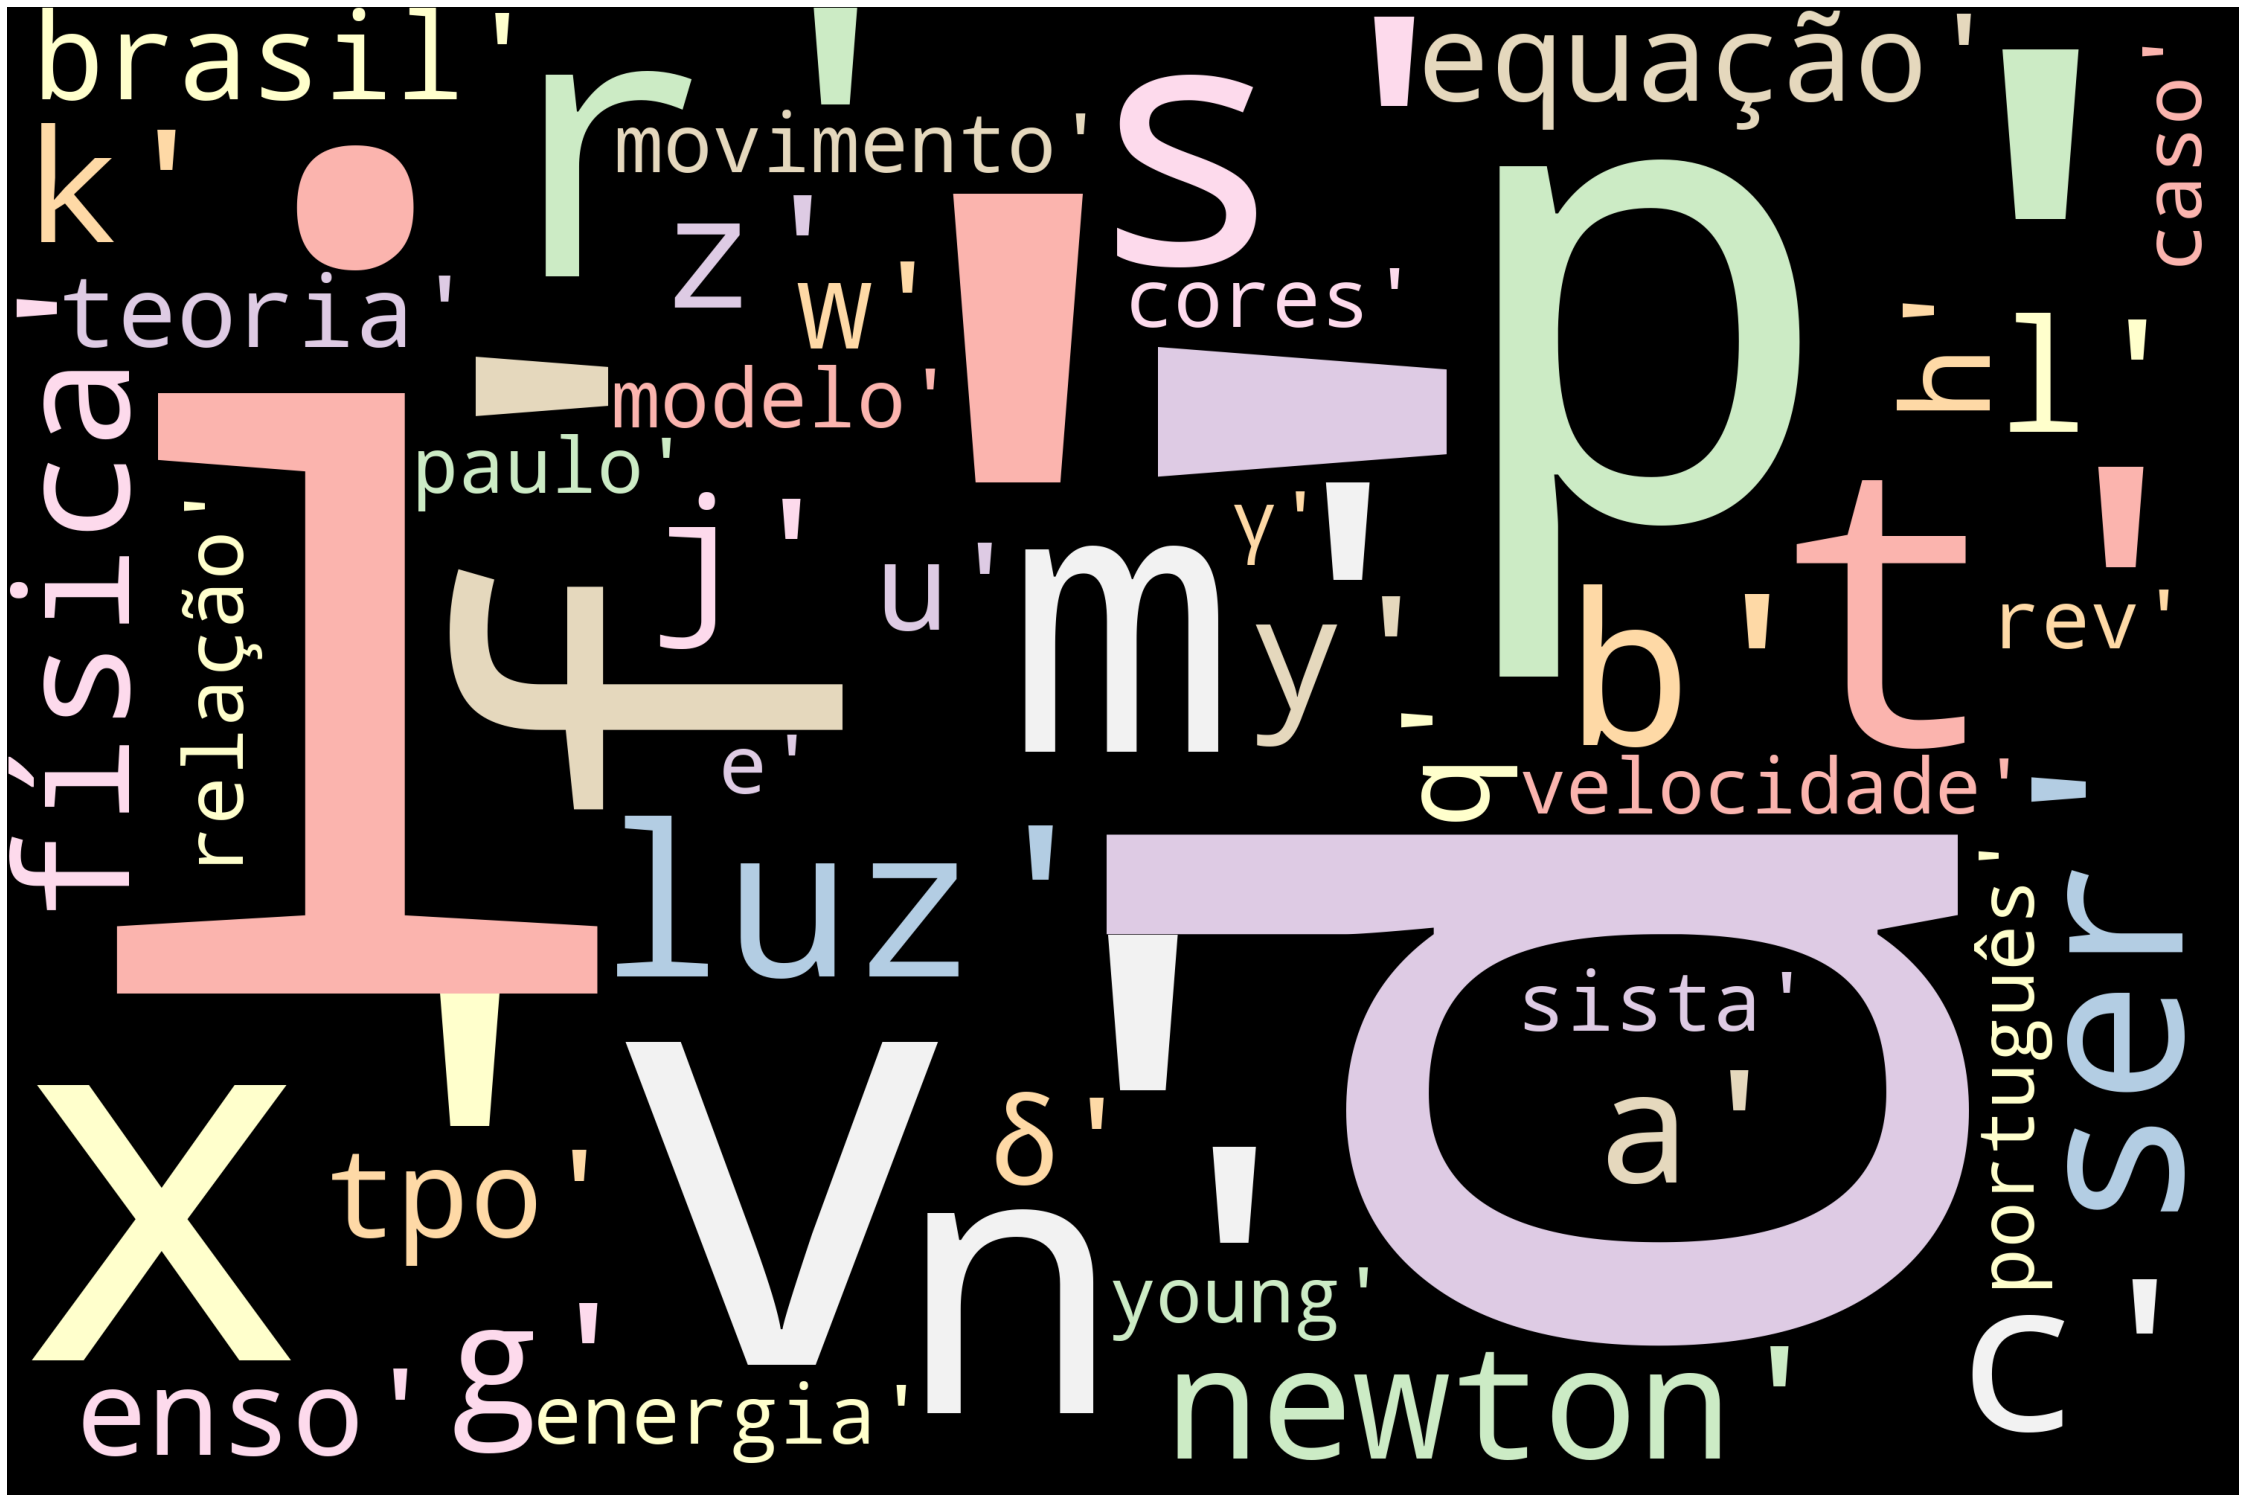

In [46]:
# Gera o wordcloud das 50 palavras mais recorrentes nos artigos htmls analisados

import re  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud 
  
def plot_cloud(wordcloud):
    # Configura o tamanho
    plt.figure(figsize=(40, 30))  
    # exibe a imagem
    plt.imshow(wordcloud)   
    # Sem detalhes do eixo
    plt.axis("off")
    
# Configura os parâmetros gráficos do wordcloud (dimensões, cores), gera e salva como imagem
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(str(cinquentaprimeiras))  
plot_cloud(wordcloud)
plt.savefig('WORDCLOUD-PCD.png')